__Author__ : Diba Elahi

__Course__ : Undergraduate Machine Learning Course

Importing needed libraries and modules.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
from matplotlib.patches import Circle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Task 1

#### a. Explore and clean the dataset. Explain your steps and reasons behind your actions (such as choosing a specific imputation technique).

Read csv file of the dataset using pandas and print the data frame output.

In [ ]:
df1 = pd.read_csv('Real estate.csv')

In [ ]:
df1

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

Column 'No' is not needed as we do not care about the order of data stored in this dataset so I drop it. (Unless we mention the incplacement of any operation on dataset we have to care about inplacement so I did $df = df.method$.)

In [ ]:
df1 = df1.drop(["No"], axis=1)

In [ ]:
df1.head()

X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  
3                        54.8  
4                        43.1

In [ ]:
df1.shape

(414, 7)

In order to handle missing values and null values, at first we need to know if any column include null value. (In this dataset we do not have null value)

In [ ]:
df1.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Describe method hepls to have better insight about our data.

In [ ]:
df1.describe()

X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148971     17.712560   
std               0.281967     11.392485   
min            2012.667000      0.000000   
25%            2012.917000      9.025000   
50%            2013.167000     16.100000   
75%            2013.417000     28.150000   
max            2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                          4.094203    24.969030    121.533361   
std                           2.945562     0.012410      0.015347   
min                           0.000000    24.932070    121.473530   
25%                           1.000000    24.963000    121.528085   
50%                           4.000000    24.971100    121.538630   
75%                           6.000000    24.977455    121.543305   
max                          10.000000    25.014590    121.566270   

       Y house price of unit area  
count                  414.000000  
mean                    37.980193  
std                     13.606488  
min                      7.600000  
25%                     27.700000  
50%                     38.450000  
75%                     46.600000  
max                    117.500000

If there are any duplication in our dataset, we will remove them not to bias our data. Here inplace=True makes sure that the operations are peformed on data not only for view but also available for any furthur operations.

In [ ]:
df1.drop_duplicates(inplace=True)
df1.shape

(414, 7)

Outliers are data points that deviate significantly from the rest of the distribution. They can affect the accuracy and validity of your analysis, especially if they are caused by errors, anomalies, or extreme values. I used percentile removal to remove outliers.

In [ ]:
def outlier_removal(data):
    drop_outliers = np.array([])
    for col in data.columns:
        upper_bound = data[col].quantile(0.99)
        lower_bound = data[col].quantile(0.01)

        df = data[col]
        indices = df[(df < lower_bound) | (df > upper_bound)].index
        drop_outliers = np.append(drop_outliers, indices)
    return drop_outliers

In [ ]:
# Outlier Removal
cleaned_df1 = df1.copy()
drop = outlier_removal(cleaned_df1)
dropped = np.unique(drop)
cleaned_df1.drop(dropped, inplace=True)
cleaned_df1.shape

(380, 7)

#### b. Visualize your data to gain better insights. Explain your findings.

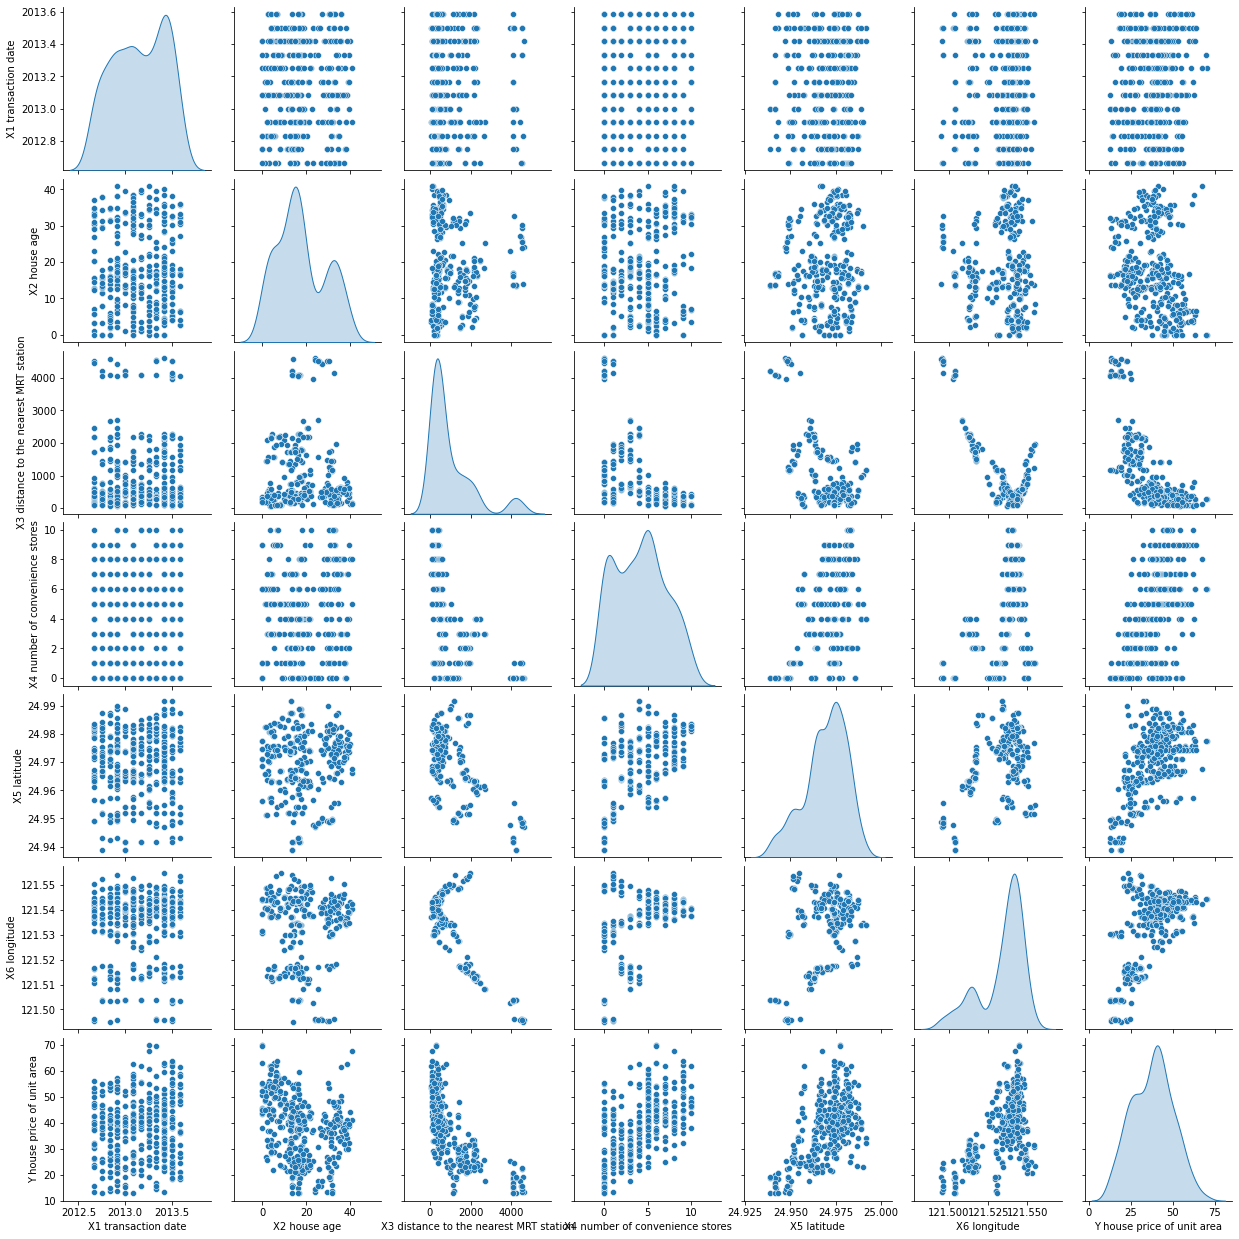

In [ ]:
sns.pairplot(cleaned_df1, diag_kind='kde')

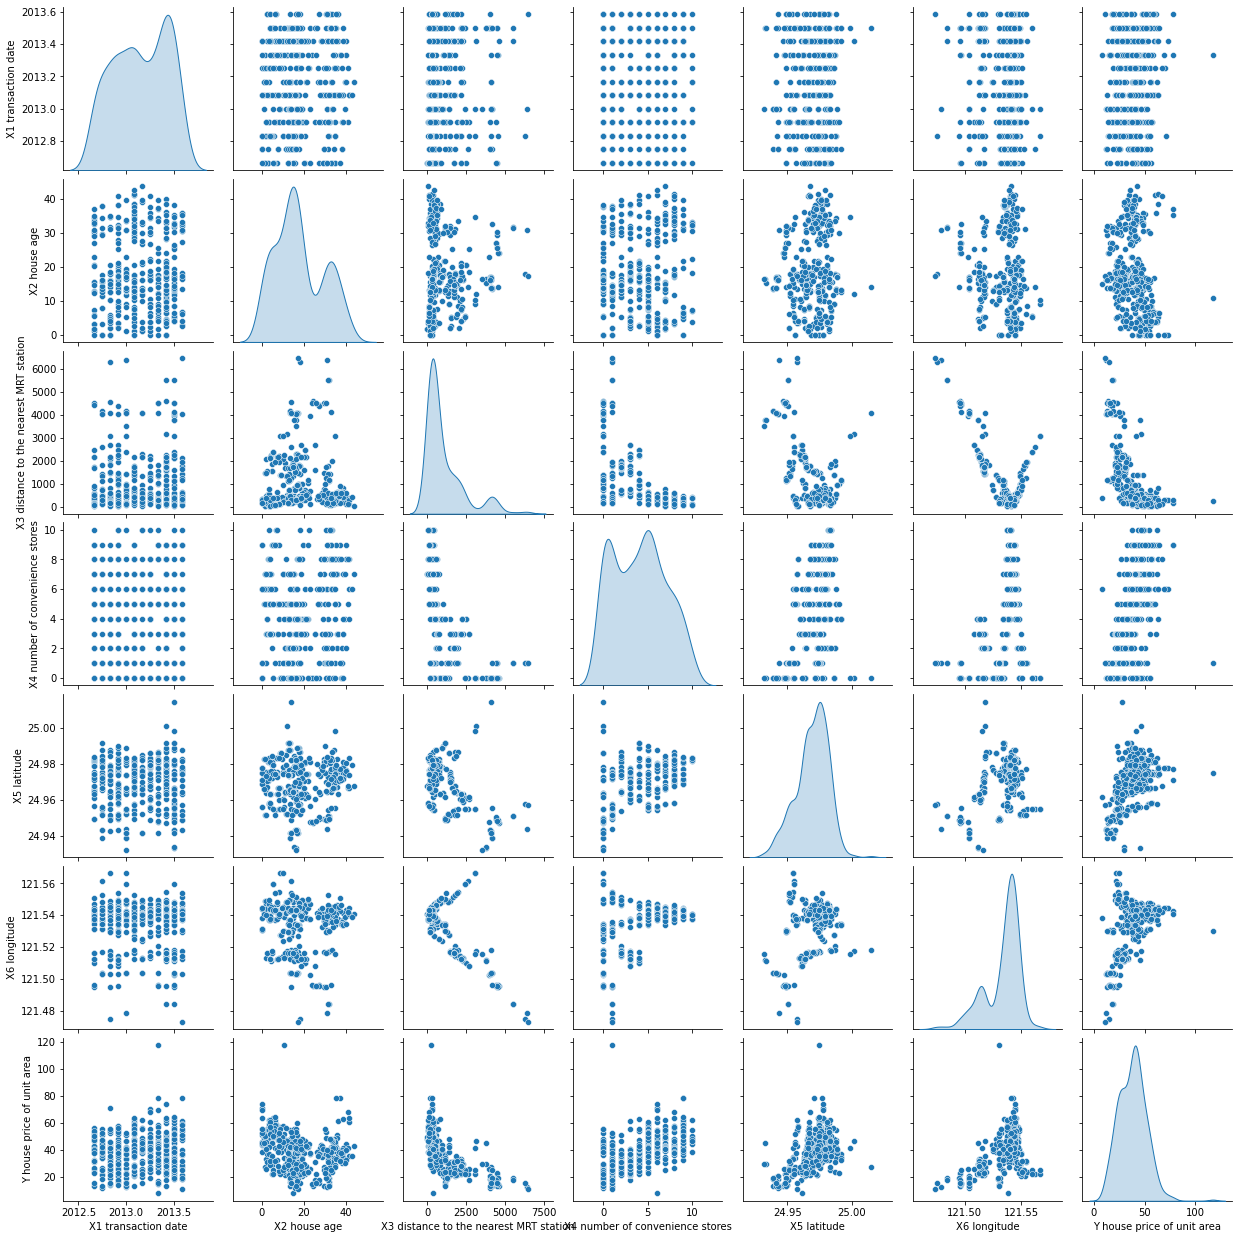

In [ ]:
sns.pairplot(df1, diag_kind='kde')

In two previous visualizations, one on full data frame and one on cleaned data frame without any outlier, we can see the results of outlier removal.

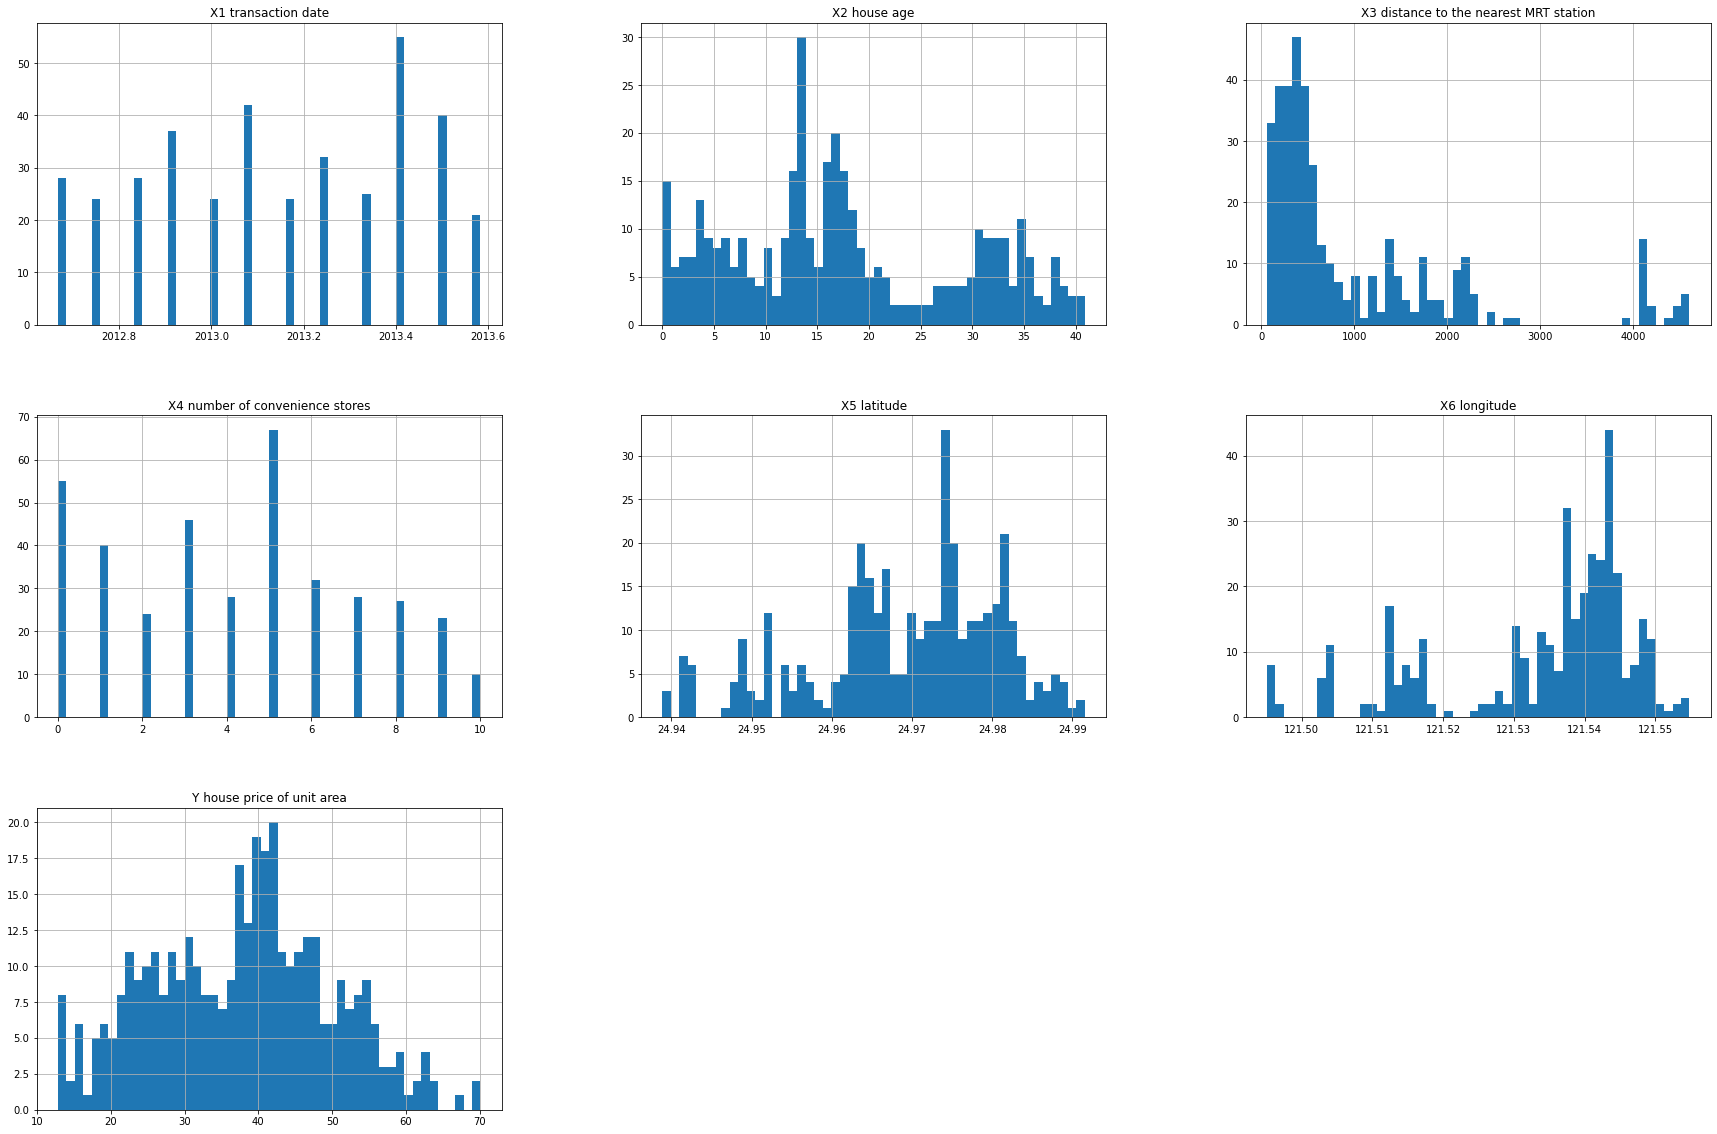

In [ ]:
cleaned_df1.hist(bins=50, figsize=(30, 20))
plt.show()

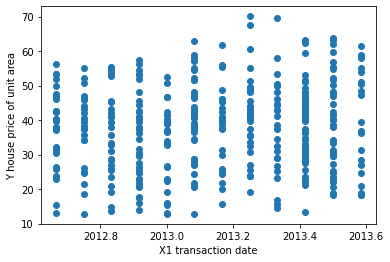

In [ ]:
X1 = cleaned_df1['X1 transaction date']
Y = cleaned_df1['Y house price of unit area']
plt.scatter(X1, Y)
plt.xlabel("X1 transaction date")
plt.ylabel("Y house price of unit area")
plt.show()

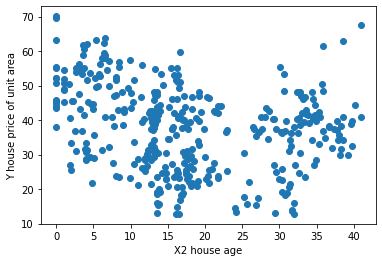

In [ ]:
X2 = cleaned_df1['X2 house age']
Y = cleaned_df1['Y house price of unit area']
plt.scatter(X2, Y)
plt.xlabel("X2 house age")
plt.ylabel("Y house price of unit area")
plt.show()

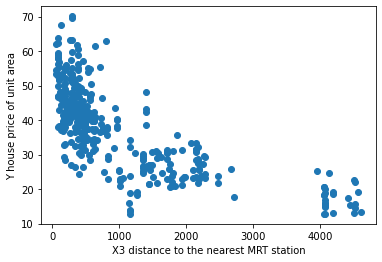

In [ ]:
X3 = cleaned_df1['X3 distance to the nearest MRT station']
Y = cleaned_df1['Y house price of unit area']
plt.scatter(X3, Y)
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("Y house price of unit area")
plt.show()

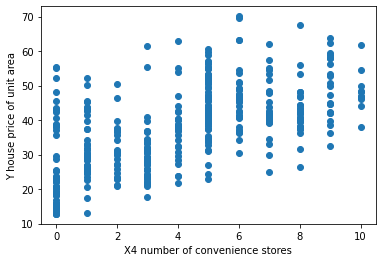

In [ ]:
X4 = cleaned_df1['X4 number of convenience stores']
Y = cleaned_df1['Y house price of unit area']
plt.scatter(X4, Y)
plt.xlabel("X4 number of convenience stores")
plt.ylabel("Y house price of unit area")
plt.show()

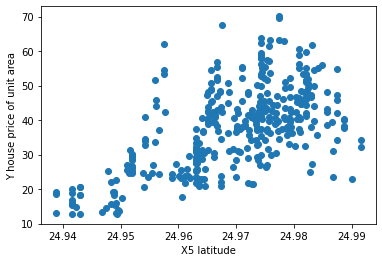

In [ ]:
X5 = cleaned_df1['X5 latitude']
Y = cleaned_df1['Y house price of unit area']
plt.scatter(X5, Y)
plt.xlabel("X5 latitude")
plt.ylabel("Y house price of unit area")
plt.show()

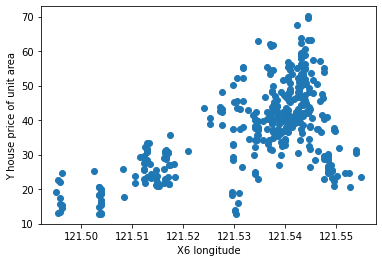

In [ ]:
X6 = cleaned_df1['X6 longitude']
Y = cleaned_df1['Y house price of unit area']
plt.scatter(X6, Y)
plt.xlabel("X6 longitude")
plt.ylabel("Y house price of unit area")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd249cc8160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd249cc87c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd2782c2cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd249cc8ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd249cc8f70>],
 'means': []}

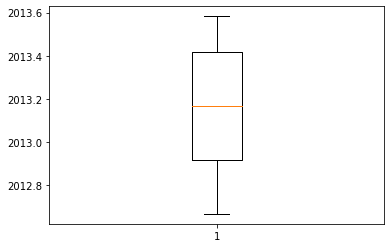

In [ ]:
plt.boxplot(X1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd249d85a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd249d92040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd249d857c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd249d925e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd249d928b0>],
 'means': []}

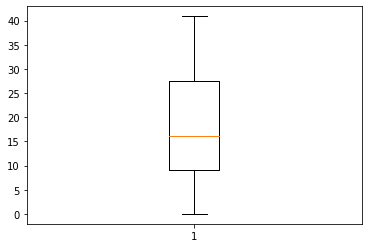

In [ ]:
plt.boxplot(X2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd278383d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd259fc2340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd278373970>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd259fc28e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd259fc2bb0>],
 'means': []}

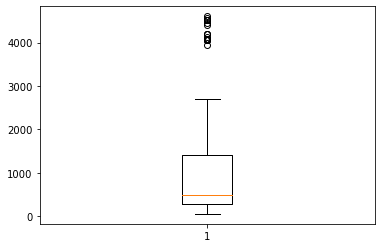

In [ ]:
plt.boxplot(X3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd22dfd96d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd22dfd9c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd22dfd9400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd22dfe4250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd22dfe4520>],
 'means': []}

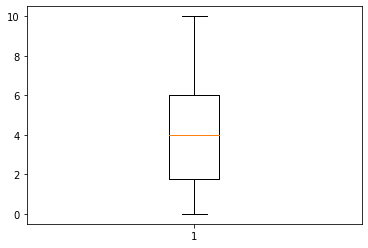

In [ ]:
plt.boxplot(X4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd249db5700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd249db5ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd249db5430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd249dc2280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd249dc2550>],
 'means': []}

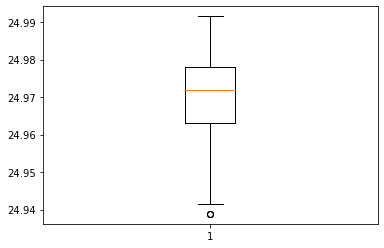

In [ ]:
plt.boxplot(X5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd278308730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd278308ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd278308460>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd278316280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd278316550>],
 'means': []}

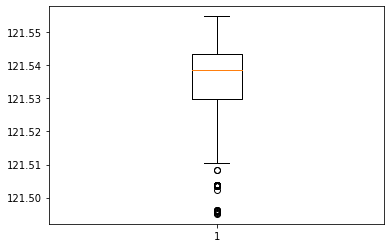

In [ ]:
plt.boxplot(X6)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd26888f580>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd26888f4c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd26888faf0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd26888feb0>}

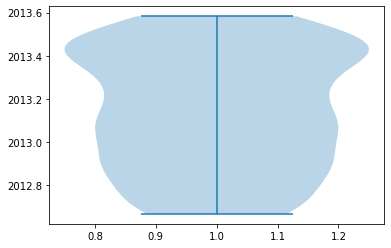

In [ ]:
plt.violinplot(X1)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd278455580>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd2688b4c10>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd278455c10>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd278455fd0>}

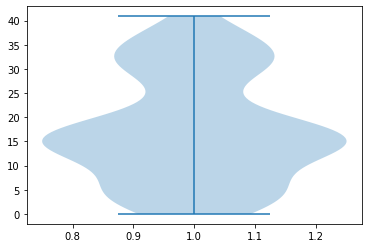

In [ ]:
plt.violinplot(X2)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd269228f10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd269228eb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd2692385e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd2692389a0>}

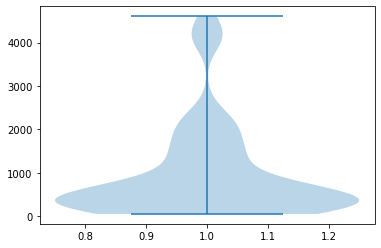

In [ ]:
plt.violinplot(X3)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd2692d1e20>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd2692d1dc0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd2692e14f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd2692e18b0>}

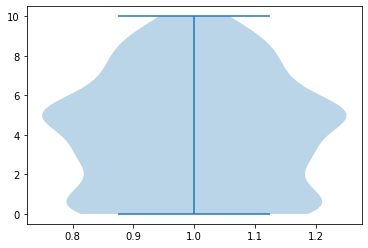

In [ ]:
plt.violinplot(X4)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd24a04b730>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd24a04b6d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd24a04bdc0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd22e2431c0>}

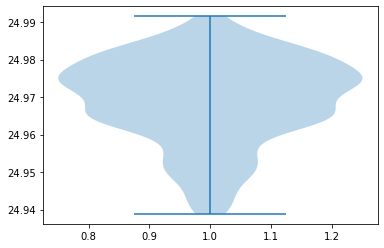

In [ ]:
plt.violinplot(X5)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd24a0cfca0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd24a0cfc40>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd24a0e0370>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd24a0e0730>}

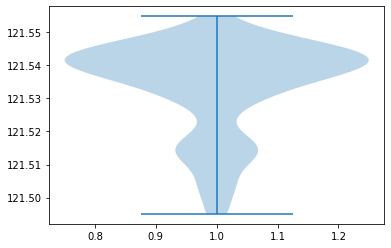

In [ ]:
plt.violinplot(X6)

#### c. Conduct the following tests. Include Null and Alternative hypothesis:

i. Test if the average price per unit area of houses above the median age is significantly different from those below the median age. Use p- value method.

Null Hypothesis (H0): The average price per unit area of houses above the median age is not significantly different from those below the median age.

Alternative Hypothesis (H1): The average price per unit area of houses above the median age is significantly different from those below the median age.

$H_{0} = \mu_{average\:price\:above\:median\:age} = \mu_{average\:price\:below\:median\:age}$


$H_{1} = \mu_{average\:price\:above\:median\:age} \neq \mu_{average\:price\:below\:median\:age}$

In [ ]:
median_age = cleaned_df1['X2 house age'].median()
above_median = cleaned_df1[cleaned_df1['X2 house age'] > median_age]['Y house price of unit area']
below_median = cleaned_df1[cleaned_df1['X2 house age'] <= median_age]['Y house price of unit area']

t_stat, p_value = stats.ttest_ind(above_median, below_median)

alpha = 0.05

print("The t-statistic is:", t_stat)
print("The p-value is:", p_value)
print("")


if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average price per unit area of houses above and below the median age.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average price per unit area of houses above and below the median age.")

The t-statistic is: -5.566063604934936
The p-value is: 4.94629796149215e-08

Reject the null hypothesis. There is a significant difference in the average price per unit area of houses above and below the median age.


ii. Investigate if the average price per unit area significantly differs by the number of convenience stores (categorized by "X4 number of convenience stores").

Null Hypothesis (H0): The average price per unit area does not significantly differ based on the number of convenience stores.

Alternative Hypothesis (H1): The average price per unit area significantly differs based on the number of convenience stores.

In [ ]:
result = f_oneway(*[cleaned_df1['Y house price of unit area'][cleaned_df1['X4 number of convenience stores'] == i] for i in cleaned_df1['X4 number of convenience stores'].unique()])


alpha = 0.05

print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)
print("")

if result.pvalue < alpha:
    print("Reject the null hypothesis. The average price per unit area significantly differs by the number of convenience stores.")
else:
    print("Fail to reject the null hypothesis. The average price per unit area does not significantly differ by the number of convenience stores.")

F-statistic: 28.974949050237804
p-value: 7.158313586504497e-41

Reject the null hypothesis. The average price per unit area significantly differs by the number of convenience stores.


iii. Choose two categorical variables and test if there's a significant association between them. (You may need to categorize some of the numerical variables.)

As we do not have any categolical feature, I tried to transfrom two features from numerical to categorical. Features house age and number of convenience stores is transformed.

In [ ]:
categorical_df = cleaned_df1.copy()
grade = []
for age in categorical_df['X2 house age']:
    if age >= 30:
        grade.append('old')
    elif age >= 10:
        grade.append('middle')
    else:
        grade.append('new')

categorical_df = categorical_df.drop('X2 house age', axis=1)
categorical_df['X2 house age'] = grade


In [ ]:
grade = []
for age in categorical_df['X4 number of convenience stores']:
    if age >= 7:
        grade.append('high')
    elif age >= 4:
        grade.append('normal')
    else:
        grade.append('low')

categorical_df = categorical_df.drop('X4 number of convenience stores', axis=1)
categorical_df['X4 number of convenience stores'] = grade


In [ ]:
categorical_df.head()

X1 transaction date  X3 distance to the nearest MRT station  X5 latitude  \
0             2012.917                                84.87882     24.98298   
1             2012.917                               306.59470     24.98034   
2             2013.583                               561.98450     24.98746   
3             2013.500                               561.98450     24.98746   
4             2012.833                               390.56840     24.97937   

   X6 longitude  Y house price of unit area X2 house age  \
0     121.54024                        37.9          old   
1     121.53951                        42.2       middle   
2     121.54391                        47.3       middle   
3     121.54391                        54.8       middle   
4     121.54245                        43.1          new   

  X4 number of convenience stores  
0                            high  
1                            high  
2                          normal  
3                          normal  
4                          normal

Null Hypothesis (H0): There is no significant association between 'X2 house age' and 'X4 number of convenience stores'.

Alternative Hypothesis (H1): There is a significant association between 'X2 house age' and 'X4 number of convenience stores'.


In [ ]:
contingency_table = pd.crosstab(categorical_df['X2 house age'], categorical_df['X4 number of convenience stores'])

chi2, p, dof, expected = chi2_contingency(contingency_table)


alpha = 0.05

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("")


if p < alpha:
    print("Reject the null hypothesis. There is a significant association between 'X2 house age' and 'X4 number of convenience stores'.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'X2 house age' and 'X4 number of convenience stores'.")

Chi-square statistic: 33.748250965382574
p-value: 8.392381513280528e-07

Reject the null hypothesis. There is a significant association between 'X2 house age' and 'X4 number of convenience stores'.


#### d. Calculate the correlation between each variable and the target variable ("Y house price of unit area") to find which variable has the highest influence on the target.

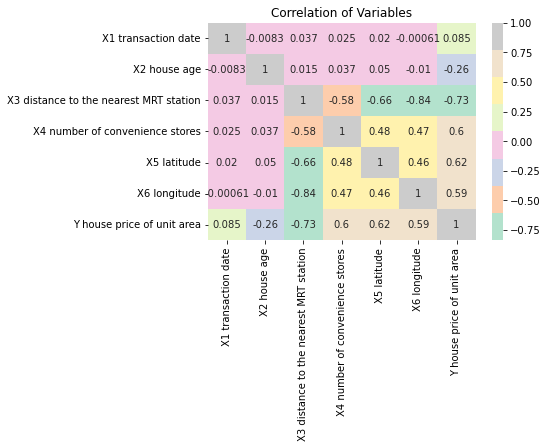

In [ ]:
correlation_matrix = cleaned_df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Pastel2")
plt.title("Correlation of Variables")
plt.show()

Correlation coefficient values range from -1 to 1. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.
A positive correlation means that as one variable increases, the other variable also tends to increase. A negative correlation means that as one variable increases, the other variable tends to decrease.
To understand which variable has a stronger effect on the result, you can look at the magnitude of the correlation coefficients. Variables with higher absolute correlation coefficients are more strongly correlated with the result variable.


As it is shown in correlation matrix, 'latitude' wih correlation 0.62 with 'Y house price of unit area', has the most effect of the result. After 'latitude','number of convenience stores' and 'lonitude' have the most effective variables respectively.
'distance to the nearest MRT station' has the least effect on the result as it has the greatest negative correlation, -0.73. By least effect here, I meanleast positive effect as its effect on the target is negative reverse

#### e. Use scikit learn to test-train split train simple linear regression model and extract the weights to confirm your findings from the last question.

At first I tried to split target from features into two different data frames. Then I split them by 80-20 train/test ration.

In [ ]:
X= cleaned_df1.drop('Y house price of unit area', axis=1)
y= cleaned_df1['Y house price of unit area']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
X_train

X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
325             2013.083          36.6   
326             2013.500           4.1   
327             2013.417           3.5   
328             2012.833          15.9   
329             2013.000          13.6   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
325                               488.81930                                8   
326                                56.47425                                7   
327                               757.33770                                3   
328                              1497.71300                                3   
329                              4197.34900                                0   

     X5 latitude  X6 longitude  
0       24.98298     121.54024  
1       24.98034     121.53951  
2       24.98746     121.54391  
3       24.98746     121.54391  
4       24.97937     121.54245  
..           ...           ...  
325     24.97015     121.54494  
326     24.95744     121.53711  
327     24.97538     121.54971  
328     24.97003     121.51696  
329     24.93885     121.50383  

[304 rows x 6 columns]

I defined a method to print the result of my trained model, when predicts on the test data. After defining a linear regression model, I printed the coefficients of the model in order to have more insight.

In [ ]:
def linear_regression_results(y_test, y_pred):
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    print('Variance', round(explained_variance, 10))
    print('R-Square: ', round(r2, 10))
    print('MAE: ', round(mae, 10))
    print('MSE: ', round(mse, 10))
    print('RMSE: ', round(np.sqrt(mse), 10))

I use skitlearn library for defining my Linear Regression model. After defining the model we have to tarin the model uisng train data and fit method. and then we can get the coefficients and test over test dataset and cmpare results.

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

print(f'Slopes(ai) : {linear_regression.coef_}')
print('Intercept(b) : ' + str(linear_regression.intercept_))
feature_names = ['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
for feature, coef in zip(feature_names, linear_regression.coef_):
    print(f'{feature}: {coef}')
y_predicted = linear_regression.predict(X_test)
linear_regression_results(y_test, y_predicted)

Slopes(ai) : [ 3.48232217e+00 -3.06789438e-01 -4.08883479e-03  1.07730322e+00
  2.79649337e+02  2.58678808e+01]
Intercept(b) : -17094.163284895738
X1 transaction date: 3.4823221689826536
X2 house age: -0.30678943832183375
X3 distance to the nearest MRT station: -0.004088834793241902
X4 number of convenience stores: 1.0773032191983316
X5 latitude: 279.6493369975979
X6 longitude: 25.867880809545934
Variance 0.6448356749
R-Square:  0.6447442598
MAE:  5.3926789258
MSE:  51.5949246923
RMSE:  7.1829607191


I tried to plot real output vs linear regression model using the method below.

In [ ]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

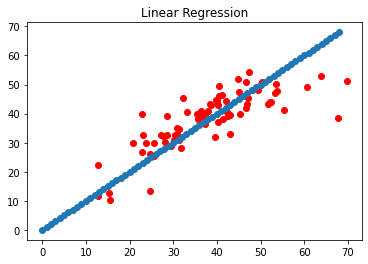

In [ ]:
plotGraph(y_test, y_predicted, 'Linear Regression')

As was asked in the question, we need to check the coefficient and make sure that coefficients confirm the correlation matrix results.
In correlation matrix we figured out that X5 latitude has the biggest correlation with target Y house price of unit area. So it is supposed that this feature has the largest coefficient too. The coefficient of X5 is 2.79649337e+02, larger than any other of the features. As a result, yes, it confirms the correlation matrix.
But it is noteworthy that it will not always happen that the feature with the biggest correlation has the largest coefficient in our trained model and this problem might be because of data and the so-called problem Multicollinearity. It is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables.
But here this phenomenon is not seen in our data. But in negative correlation we can see this phenomenon. The 'distance to the nearest MRT station' has the least effect on the result as it has the greatest negative correlation, -0.73 and it is supposed to have the smallest (considering negative sign) coefficient. But its coefficient is  -4.08883479e-03 but we have a smaller coefficient -3.06789438e-01 which is for X2 house age. We can say that because of multicolinearity this happened. So we will once try to remove the feature that has a very high correlation with 'distance to the nearest MRT station', which is X6 longitude.  

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

### Task 2

#### a. Explore and clean the dataset. Explain your steps and reasons behind your actions (such as choosing a specific imputation technique). Visualize your data to gain better insights. Explain your findings.

Read csv file of the dataset using pandas and print the data frame output.

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [ ]:
df.shape

(2938, 22)

In order to handle missing values and null values, at first we need to know if any column include null value. As we have null values, I have dropped all the rows even iof they have one null feature.

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.000000       0.000000   
25%       0.810000               37.438577    74.000000       0.000000   
50%       3.790000              145.102253    89.000000      15.000000   
75%       7.340000              509.389994    96.000000     373.000000   
max      17.870000            18961.348600    99.000000  131441.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1649.000000         1649.000000  1649.000000        1649.000000   
mean     38.128623           44.220133    83.564585           5.955925   
std      19.754249          162.897999    22.450557           2.299385   
min       2.000000            0.000000     3.000000           0.740000   
25%      19.500000            1.000000    81.000000           4.410000   
50%      43.700000            4.000000    93.000000           5.840000   
75%      55.800000           29.000000    97.000000           7.470000   
max      77.100000         2100.000000    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  1649.000000  1649.000000    1649.000000  1.649000e+03   
mean     84.155246     1.983869    5566.031887  1.465363e+07   
std      21.579193     6.032360   11475.900117  7.046039e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      82.000000     0.100000     462.149650  1.918970e+05   
50%      92.000000     0.100000    1592.572182  1.419631e+06   
75%      97.000000     0.700000    4718.512910  7.658972e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1649.000000          1649.000000   
mean                4.850637             4.907762   
std                 4.599228             4.653757   
min                 0.100000             0.100000   
25%                 1.600000             1.700000   
50%                 3.000000             3.200000   
75%                 7.100000             7.100000   
max                27.200000            28.200000   

       Income composition of resources    Schooling  
count                      1649.000000  1649.000000  
mean                          0.631551    12.119891  
std                           0.183089     2.795388  
min                           0.000000     4.200000  
25%                           0.509000    10.300000  
50%                           0.673000    12.300000  
75%                           0.751000    14.000000  
max                           0.936000    20.700000

If there are any duplication in our dataset, we will remove them not to bias our data.

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1649, 22)

This dataset includes 2 categorical features and they need to be encoded into numerical values. In the code cell below I transfrom them into numerical values.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder1 = OrdinalEncoder()
ordinal_encoder2 = OrdinalEncoder()
df = df.copy()
df['Country'] = ordinal_encoder1.fit_transform(df['Country'].values.reshape(-1, 1))
df['Status'] = ordinal_encoder2.fit_transform(df['Status'].values.reshape(-1, 1))

In [ ]:
df

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0         0.0  2015     1.0              65.0            263.0             62   
1         0.0  2014     1.0              59.9            271.0             64   
2         0.0  2013     1.0              59.9            268.0             66   
3         0.0  2012     1.0              59.5            272.0             69   
4         0.0  2011     1.0              59.2            275.0             71   
...       ...   ...     ...               ...              ...            ...   
2933    132.0  2004     1.0              44.3            723.0             27   
2934    132.0  2003     1.0              44.5            715.0             26   
2935    132.0  2002     1.0              44.8             73.0             25   
2936    132.0  2001     1.0              45.3            686.0             25   
2937    132.0  2000     1.0              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles   ...  Polio  \
0        0.01               71.279624         65.0      1154  ...    6.0   
1        0.01               73.523582         62.0       492  ...   58.0   
2        0.01               73.219243         64.0       430  ...   62.0   
3        0.01               78.184215         67.0      2787  ...   67.0   
4        0.01                7.097109         68.0      3013  ...   68.0   
...       ...                     ...          ...       ...  ...    ...   
2933     4.36                0.000000         68.0        31  ...   67.0   
2934     4.06                0.000000          7.0       998  ...    7.0   
2935     4.43                0.000000         73.0       304  ...   73.0   
2936     1.72                0.000000         76.0       529  ...   76.0   
2937     1.68                0.000000         79.0      1483  ...   78.0   

      Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0                  8.16         65.0        0.1  584.259210  33736494.0   
1                  8.18         62.0        0.1  612.696514    327582.0   
2                  8.13         64.0        0.1  631.744976  31731688.0   
3                  8.52         67.0        0.1  669.959000   3696958.0   
4                  7.87         68.0        0.1   63.537231   2978599.0   
...                 ...          ...        ...         ...         ...   
2933               7.13         65.0       33.6  454.366654  12777511.0   
2934               6.52         68.0       36.7  453.351155  12633897.0   
2935               6.53         71.0       39.8   57.348340    125525.0   
2936               6.16         75.0       42.1  548.587312  12366165.0   
2937               7.10         78.0       43.5  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0

In [ ]:
df['Status'].unique()

array([1., 0.])

In [ ]:
df['Country'].unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132.])

In [ ]:
df.describe().T

count          mean           std  \
Country                          1649.0  6.619345e+01  3.889201e+01   
Year                             1649.0  2.007841e+03  4.087711e+00   
Status                           1649.0  8.532444e-01  3.539695e-01   
Life expectancy                  1649.0  6.930230e+01  8.796834e+00   
Adult Mortality                  1649.0  1.682153e+02  1.253104e+02   
infant deaths                    1649.0  3.255306e+01  1.208472e+02   
Alcohol                          1649.0  4.533196e+00  4.029189e+00   
percentage expenditure           1649.0  6.989736e+02  1.759229e+03   
Hepatitis B                      1649.0  7.921771e+01  2.560466e+01   
Measles                          1649.0  2.224494e+03  1.008580e+04   
 BMI                             1649.0  3.812862e+01  1.975425e+01   
under-five deaths                1649.0  4.422013e+01  1.628980e+02   
Polio                            1649.0  8.356458e+01  2.245056e+01   
Total expenditure                1649.0  5.955925e+00  2.299385e+00   
Diphtheria                       1649.0  8.415525e+01  2.157919e+01   
 HIV/AIDS                        1649.0  1.983869e+00  6.032360e+00   
GDP                              1649.0  5.566032e+03  1.147590e+04   
Population                       1649.0  1.465363e+07  7.046039e+07   
 thinness  1-19 years            1649.0  4.850637e+00  4.599228e+00   
 thinness 5-9 years              1649.0  4.907762e+00  4.653757e+00   
Income composition of resources  1649.0  6.315512e-01  1.830887e-01   
Schooling                        1649.0  1.211989e+01  2.795388e+00   

                                        min            25%           50%  \
Country                             0.00000      32.000000  6.700000e+01   
Year                             2000.00000    2005.000000  2.008000e+03   
Status                              0.00000       1.000000  1.000000e+00   
Life expectancy                    44.00000      64.400000  7.170000e+01   
Adult Mortality                     1.00000      77.000000  1.480000e+02   
infant deaths                       0.00000       1.000000  3.000000e+00   
Alcohol                             0.01000       0.810000  3.790000e+00   
percentage expenditure              0.00000      37.438577  1.451023e+02   
Hepatitis B                         2.00000      74.000000  8.900000e+01   
Measles                             0.00000       0.000000  1.500000e+01   
 BMI                                2.00000      19.500000  4.370000e+01   
under-five deaths                   0.00000       1.000000  4.000000e+00   
Polio                               3.00000      81.000000  9.300000e+01   
Total expenditure                   0.74000       4.410000  5.840000e+00   
Diphtheria                          2.00000      82.000000  9.200000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     462.149650  1.592572e+03   
Population                         34.00000  191897.000000  1.419631e+06   
 thinness  1-19 years               0.10000       1.600000  3.000000e+00   
 thinness 5-9 years                 0.10000       1.700000  3.200000e+00   
Income composition of resources     0.00000       0.509000  6.730000e-01   
Schooling                           4.20000      10.300000  1.230000e+01   

                                          75%           max  
Country                          1.000000e+02  1.320000e+02  
Year                             2.011000e+03  2.015000e+03  
Status                           1.000000e+00  1.000000e+00  
Life expectancy                  7.500000e+01  8.900000e+01  
Adult Mortality                  2.270000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.600000e+03  
Alcohol                          7.340000e+00  1.787000e+01  
percentage expenditure           5.093900e+02  1.896135e+04  
Hepatitis B                      9.600000e+01  9.900000e+01  
Measles                        

Outliers are data points that deviate significantly from the rest of the distribution. They can affect the accuracy and validity of your analysis, especially if they are caused by errors, anomalies, or extreme values. I used percentile removal to remove outliers.

In [ ]:
def outlier_removal(data):
    drop_outliers = np.array([])
    for col in data.columns:
        upper_bound = data[col].quantile(0.99)
        lower_bound = data[col].quantile(0.01)

        df = data[col]
        indices = df[(df < lower_bound) | (df > upper_bound)].index
        drop_outliers = np.append(drop_outliers, indices)
    return drop_outliers


In [ ]:
# Outlier Removal
cleaned_df = df.copy()
drop = outlier_removal(cleaned_df)
dropped = np.unique(drop)
cleaned_df.drop(dropped, inplace=True)
cleaned_df.shape

(1334, 22)

Visualization

In [ ]:
def show_pairplot(data):
    pairplot_feature = [*data, 'Life expectancy ']
    sns.pairplot(cleaned_df, vars=pairplot_feature, diag_kind='kde')

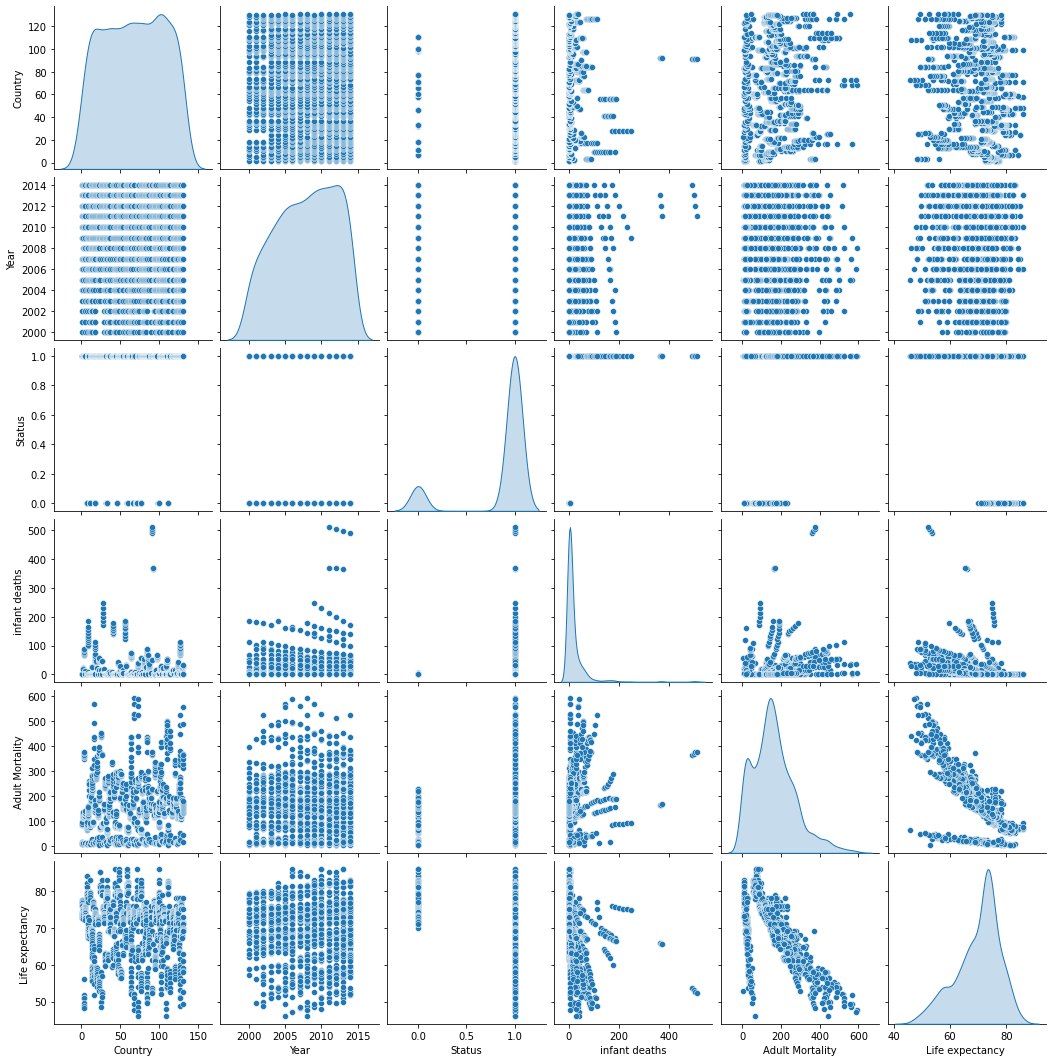

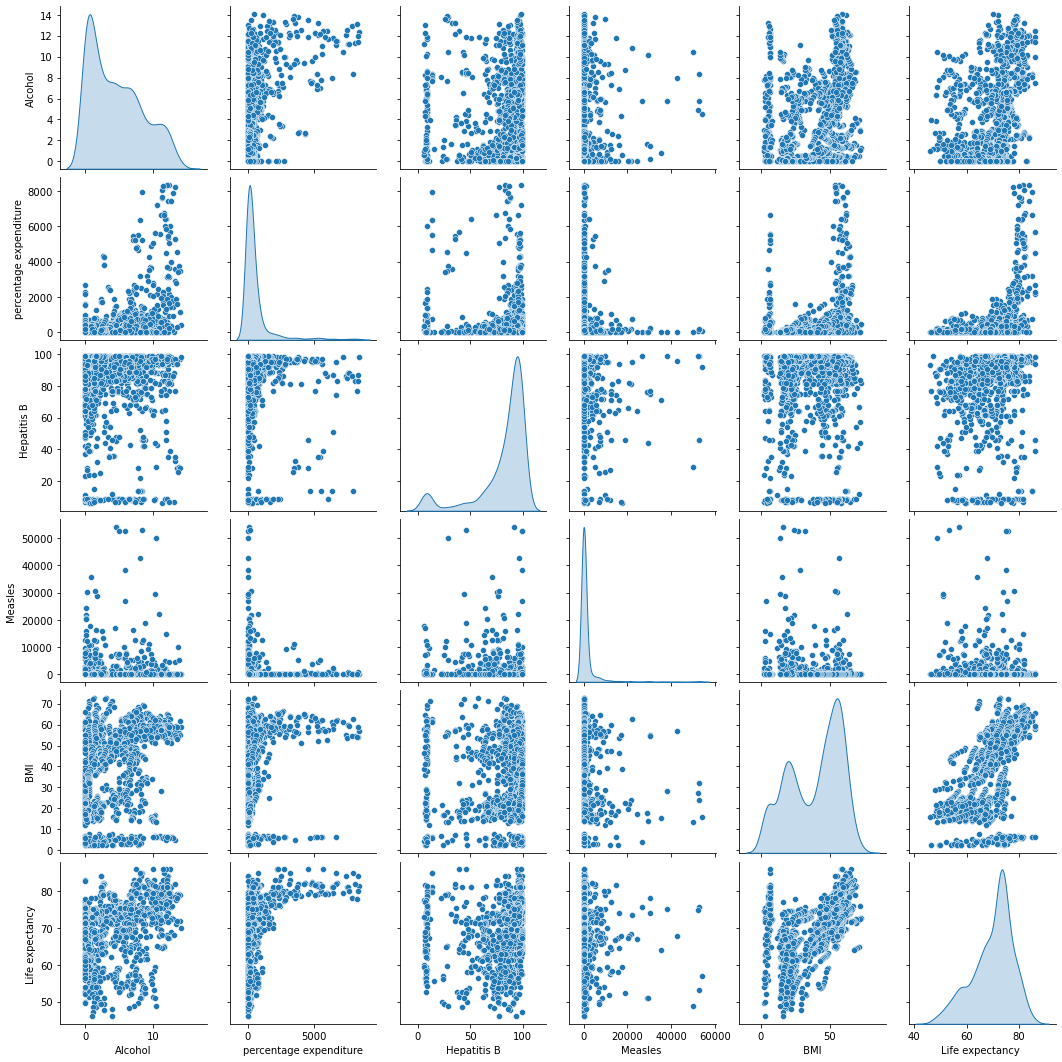

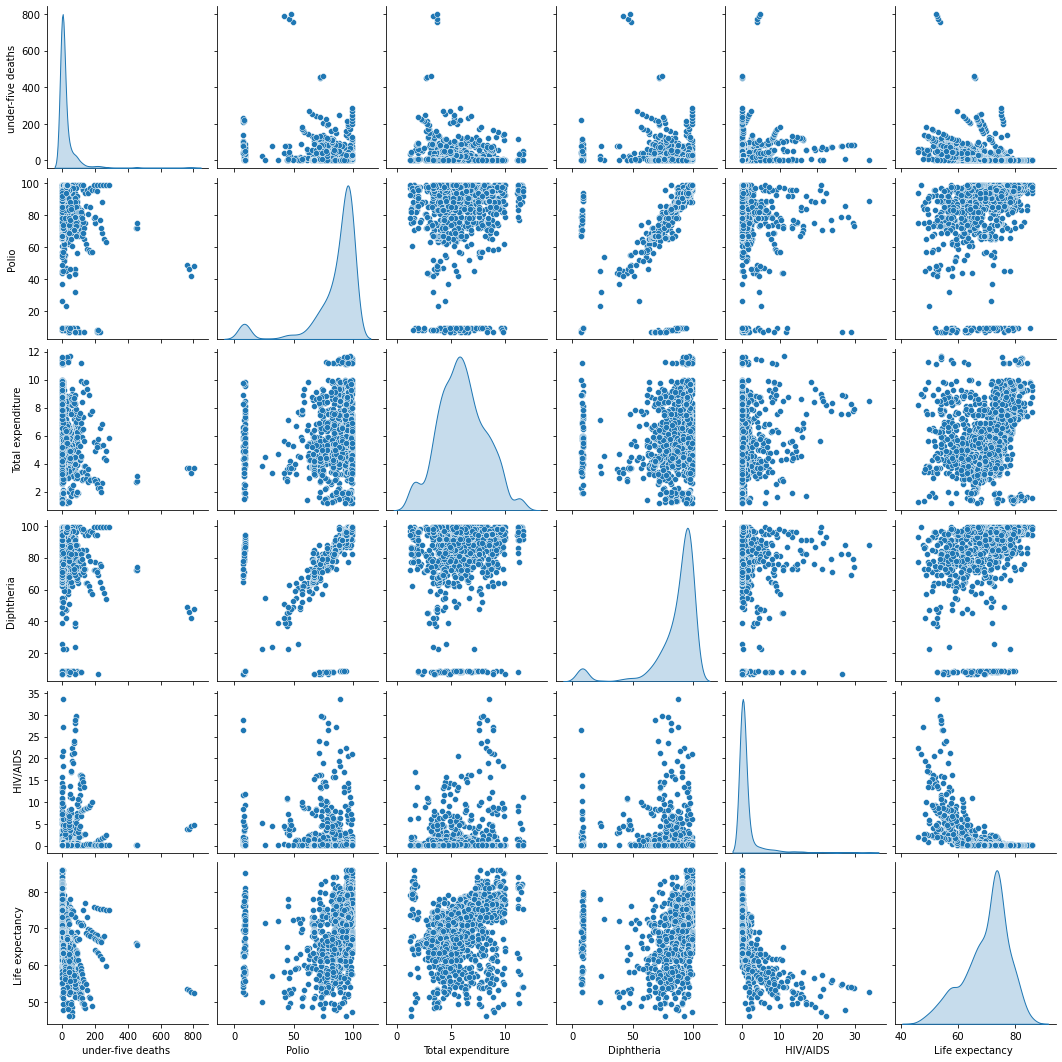

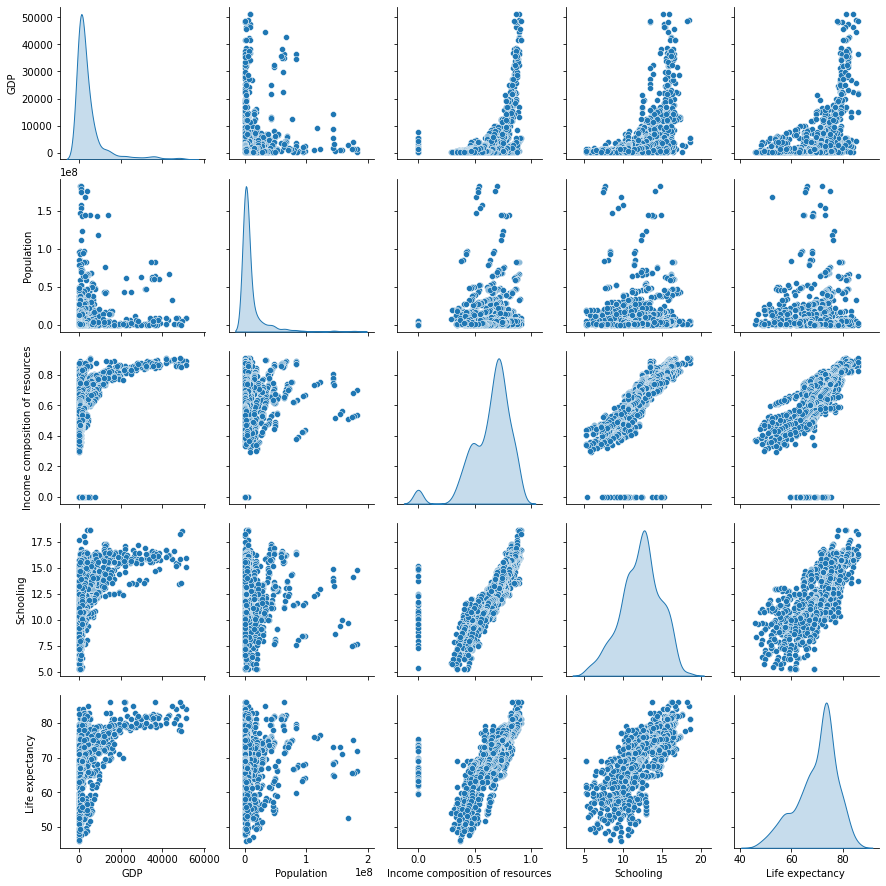

In [ ]:
reference_features = ['Country', 'Year', 'Status', 'infant deaths', 'Adult Mortality']
show_pairplot(reference_features)
reference_features = ['Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ']
show_pairplot(reference_features)
reference_features = ['under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS']
show_pairplot(reference_features)
reference_features = ['GDP', 'Population',  'Income composition of resources', 'Schooling']
show_pairplot(reference_features)

In [ ]:
def show_pairplot(data):
    pairplot_feature = [*data, 'Life expectancy ']
    sns.pairplot(df, vars=pairplot_feature, diag_kind='kde')

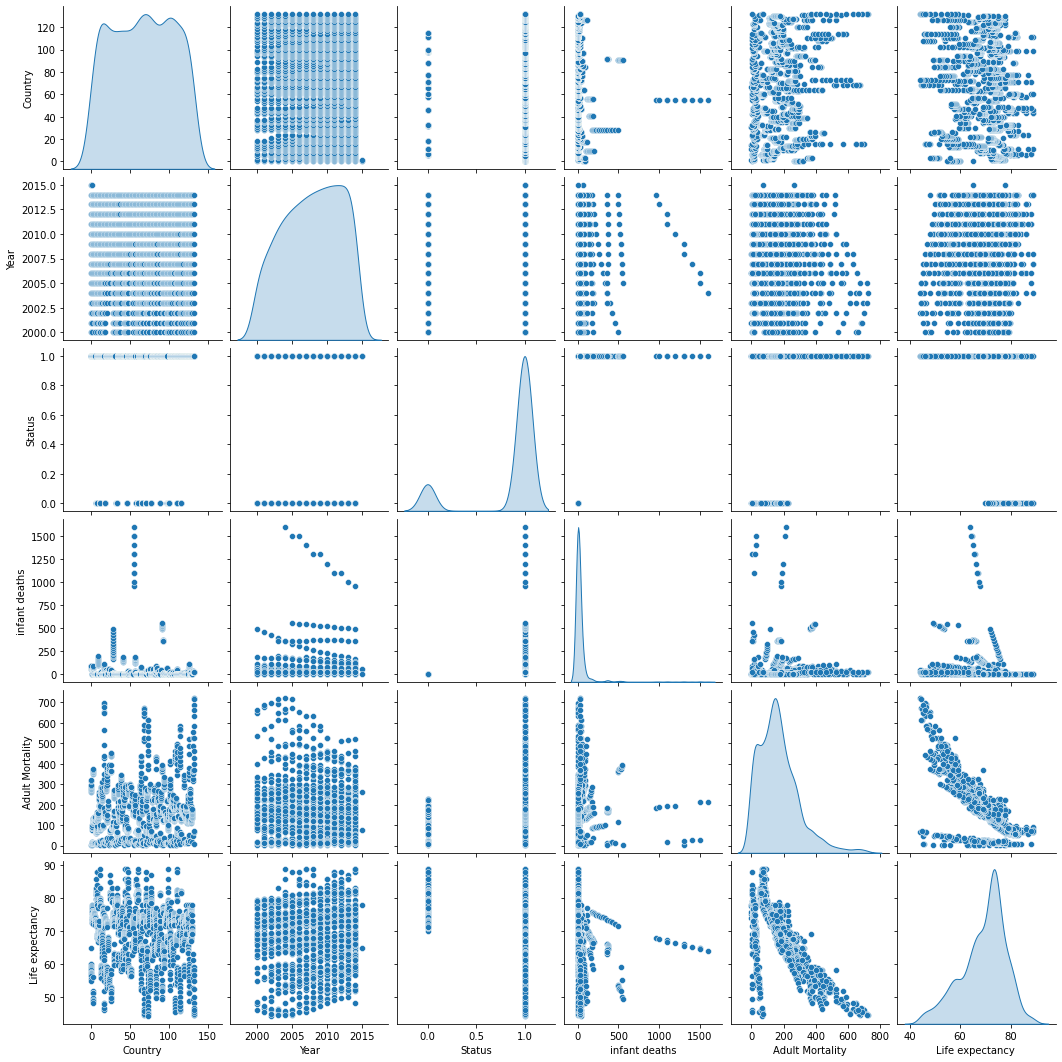

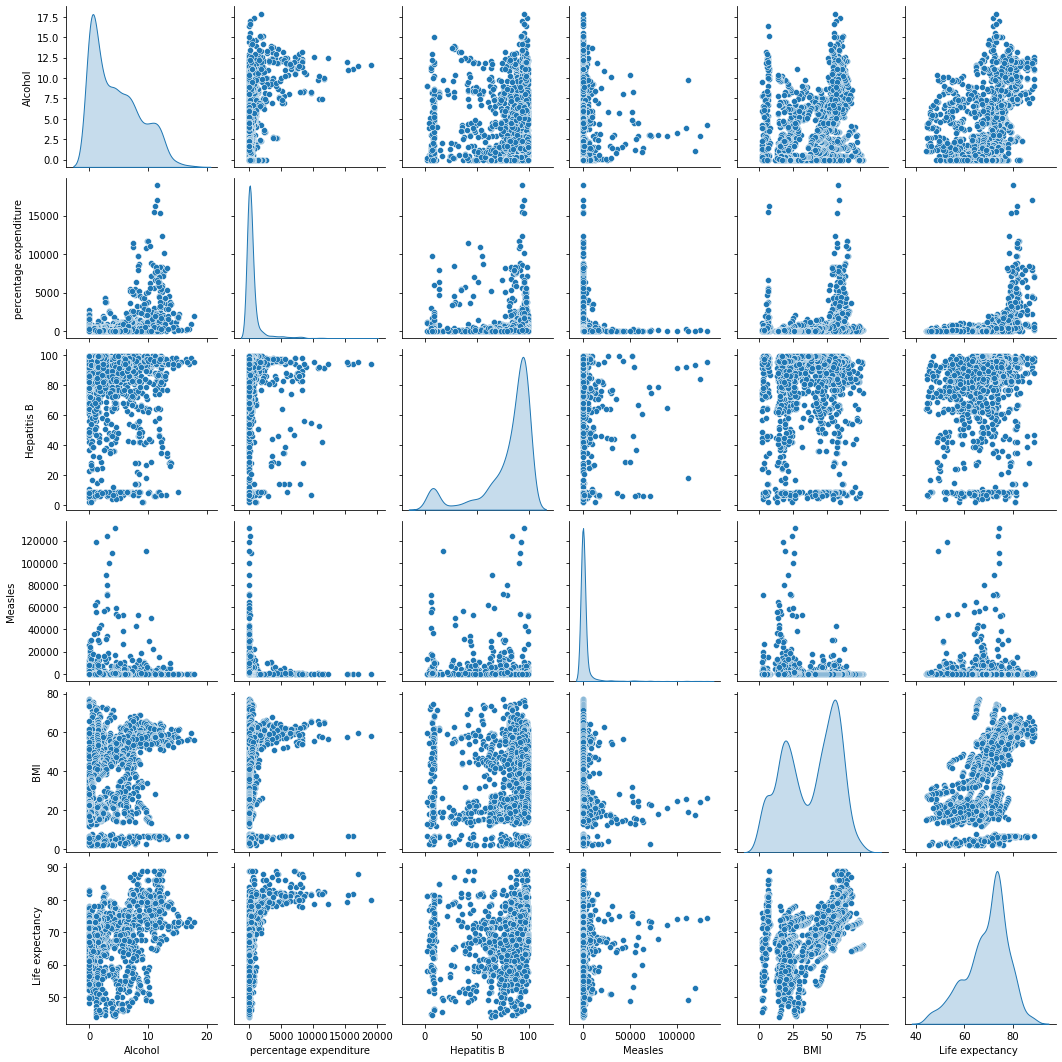

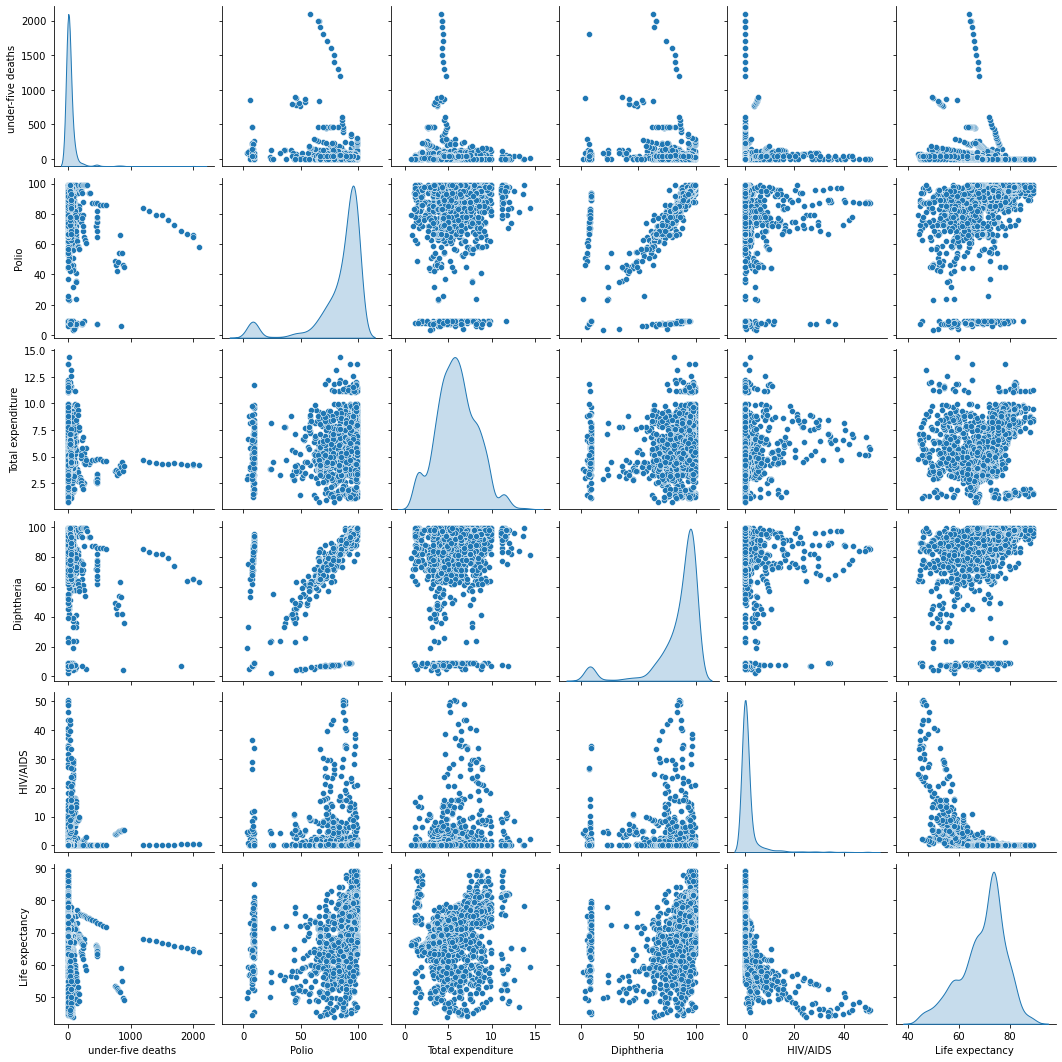

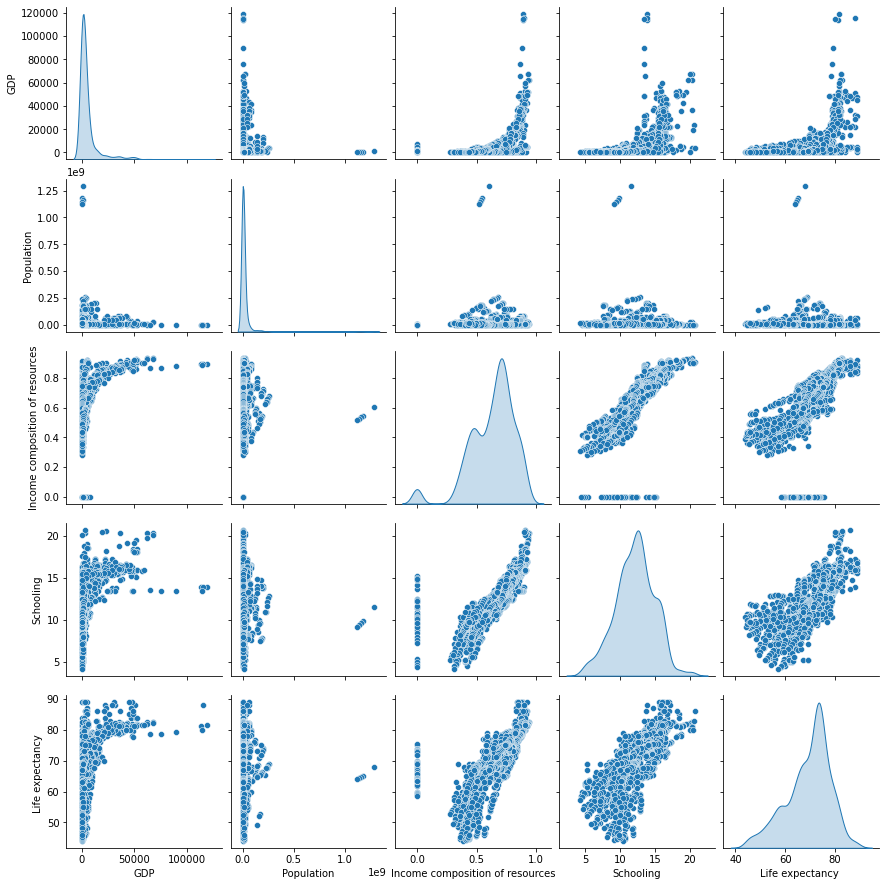

In [ ]:
reference_features = ['Country', 'Year', 'Status', 'infant deaths', 'Adult Mortality']
show_pairplot(reference_features)
reference_features = ['Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ']
show_pairplot(reference_features)
reference_features = ['under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS']
show_pairplot(reference_features)
reference_features = ['GDP', 'Population',  'Income composition of resources', 'Schooling']
show_pairplot(reference_features)

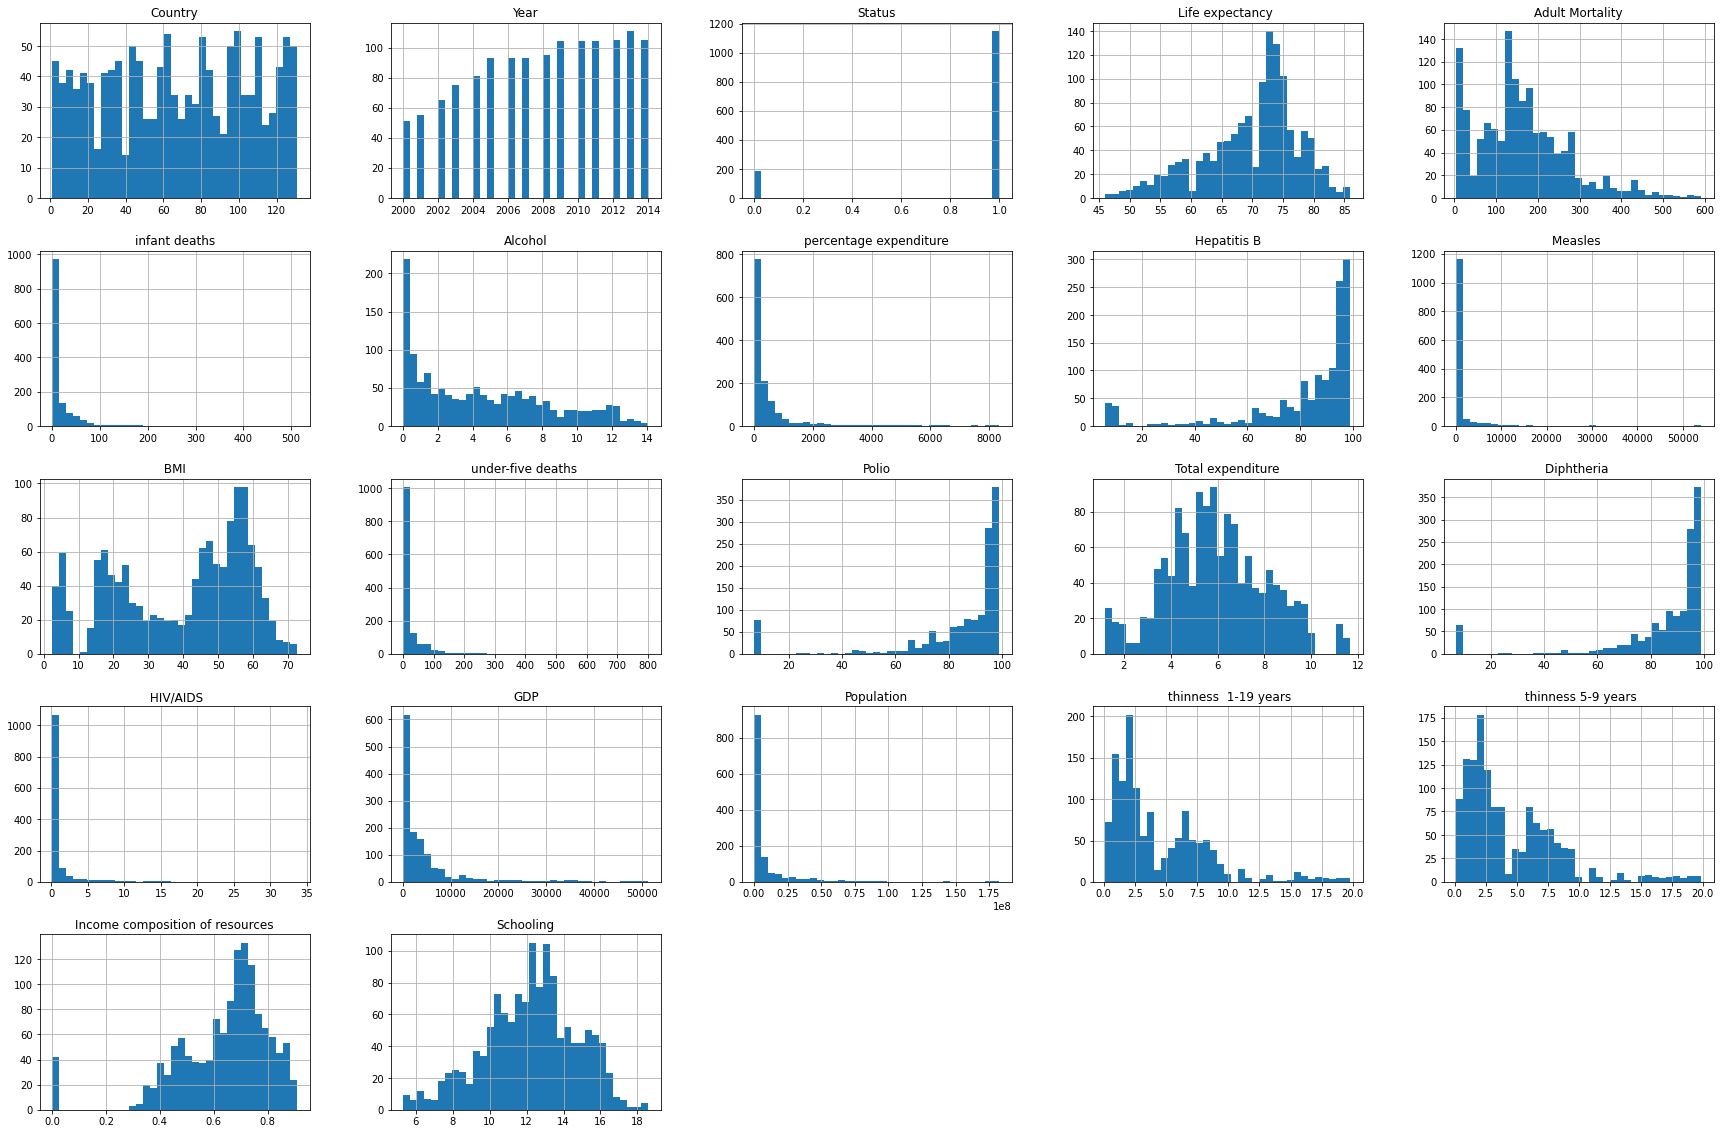

In [ ]:
cleaned_df.hist(bins=35, figsize=(30, 20))
plt.show()

#### b. Conduct the following tests.Include Null and Alternative hypothesis:

i. Investigate the relationship between Status (Developed vs. Developing) and the prevalence of a disease (for example, "Hepatitis B" vaccination rates).

Null Hypothesis (H0): There is no significant difference in ‘Hepatitis B’ vaccination rates between developed and developing countries.

Alternative Hypothesis (H1):
There is a significant difference in ‘Hepatitis B’ vaccination rates between developed and developing countries.

In [ ]:
developed_data = cleaned_df[cleaned_df['Status'] == 0]['Hepatitis B']
developing_data = cleaned_df[cleaned_df['Status'] == 1]['Hepatitis B']
t_stat, p_value = stats.ttest_ind(developed_data, developing_data, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in Hepatitis B vaccination rates between developed and developing countries.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Hepatitis B vaccination rates between developed and developing countries.")

t-statistic: 6.587844212911846
p-value: 1.865120919714616e-10
Reject the null hypothesis. There is a significant difference in Hepatitis B vaccination rates between developed and developing countries.


ii. Compare the life expectancy ("Life expectancy") between two groups defined by the "Status" column (Developed vs. Developing countries).


Null Hypothesis (H0):
There is no significant difference in life expectancy between developed and developing countries.
Alternative Hypothesis (H1):
There is a significant difference in life expectancy between developed and developing countries.

In [ ]:
developed_data = cleaned_df[cleaned_df['Status'] == 0]['Life expectancy ']
developing_data = cleaned_df[cleaned_df['Status'] == 1]['Life expectancy ']

t_stat, p_value = stats.mannwhitneyu(developed_data, developing_data, alternative='two-sided')

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in life expectancy between developed and developing countries.")
else:
    print("Fail to reject the null hypothesis.There is no significant difference in life expectancy between developed and developing countries.")

t-statistic: 183130.5
p-value: 3.4190737001751147e-57
Reject the null hypothesis. There is a significant difference in life expectancy between developed and developing countries.


iii. Compare the life expectancy ("Life expectancy") across multiple groups defined by the "Year" column.


Null Hypothesis (H0):
There is no significant difference in life expectancy across the different years.

Alternative Hypothesis (H1):
There is a significant difference in life expectancy across the different years.

In [ ]:
model = ols('Q("Life expectancy ") ~ C(Year)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
p_value = anova_table['PR(>F)'][0]
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in life expectancy across the different years.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in life expectancy across the different years.")

                sum_sq      df         F    PR(>F)
C(Year)     359.395581    14.0  0.423832  0.967804
Residual  79890.662650  1319.0       NaN       NaN
Fail to reject the null hypothesis. There is no significant difference in life expectancy across the different years.


iv. Design 2 more hypothesis tests to further explore the dataset.

#### First hypothesis test : Correlation between Life Expectancy and GDP

Null Hypothesis (H0): There is no significant correlation between life expectancy and GDP.
    
Alternative Hypothesis (H1): There is a significant correlation between life expectancy and GDP.

In [ ]:
corr, p_value = stats.pearsonr(cleaned_df['Life expectancy '], cleaned_df['GDP'])

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis - There is a significant correlation between life expectancy and GDP.")
else:
    print("Fail to reject the null hypothesis - There is no significant correlation between life expectancy and GDP.")

Pearson correlation coefficient: 0.46236122632130316
P-value: 1.2781128524431686e-71
Reject the null hypothesis - There is a significant correlation between life expectancy and GDP.


#### Impact of Polio and Hepatitis B on Life Expectancy

Null Hypothesis (H0): Immunization rates for Polio and Hepatitis B have no significant impact on life expectancy.

Alternative Hypothesis (H1): Immunization rates for Polio and Hepatitis B have a significant impact on life expectancy.

In [ ]:
model = sm.OLS(cleaned_df['Life expectancy '], cleaned_df[['Polio', 'Hepatitis B']]).fit()

print(model.summary())

if model.pvalues['Polio'] < 0.05 or model.pvalues['Hepatitis B'] < 0.05:
    print("At least one of the immunization rates has a significant impact on life expectancy.")
else:
    print("Neither Polio nor Hepatitis B immunization rate has a significant impact on life expectancy.")

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          1.288e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:46:28   Log-Likelihood:                         -5557.6
No. Observations:                1334   AIC:                                  1.112e+04
Df Residuals:                    1332   BIC:                                  1.113e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

#### c. Calculate the correlation between each variable and the target variable ("Life expectancy")


In [ ]:
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(cleaned_df.corr(), annot = True, fmt = '.2f')

<AxesSubplot:>

Correlation coefficient values range from -1 to 1. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.
A positive correlation means that as one variable increases, the other variable also tends to increase. A negative correlation means that as one variable increases, the other variable tends to decrease.
To understand which variable has a stronger effect on the result, you can look at the magnitude of the correlation coefficients. Variables with higher absolute correlation coefficients are more strongly correlated with the result variable.


As it is shown in correlation matrix, 'schooling' wih correlation 0.73 with 'Life expectancy', has the most effect of the result. After 'schooling', 'Income composition of resources' and 'BMI' have the most effective variables respectively.
'Adult morality' has the least effect on the result as it has the greatest negative correlation, -0.71.

#### d. Test-train split your dataset such that there are no countries in both test and train splits. Now train two linear regression models, one including the column "Country" and another one with this column removed. How did it affect your model performance on test split? Which approach is correct?

At first I split data in a way that in train and test dataset there is no overlap in country column. Then I defined and trained a linear regression model using train data and after that test it using test data and olot data and linear regression model.

In [ ]:
# Choose the column to exclude from either the training or testing set
column_to_exclude = 'Country'

# Split the data into two sets ensuring the chosen column values do not overlap
unique_values = cleaned_df[column_to_exclude].unique()
train_values, test_values = train_test_split(unique_values, test_size=0.2, random_state=42)

train_data = cleaned_df[cleaned_df[column_to_exclude].isin(train_values)]
test_data = cleaned_df[cleaned_df[column_to_exclude].isin(test_values)]

x_train = train_data.drop('Life expectancy ', axis=1)
x_test = test_data.drop('Life expectancy ', axis=1)
y_train = train_data['Life expectancy ']
y_test = test_data['Life expectancy ']

In [ ]:
def linear_regression_results(y_test, y_pred):
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    print('Variance', round(explained_variance, 10))
    print('R-Square: ', round(r2, 10))
    print('MAE: ', round(mae, 10))
    print('MSE: ', round(mse, 10))
    print('RMSE: ', round(np.sqrt(mse), 10))

In [ ]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

print(f'Slopes(ai) : {linear_regression.coef_}')
print('Intercept(b) : ' + str(linear_regression.intercept_))

y_predicted = linear_regression.predict(x_test)
linear_regression_results(y_test, y_predicted)

Slopes(ai) : [-2.98151941e-04 -1.50873542e-01 -1.29674815e-01 -1.79733120e-02
  8.42728900e-02 -1.95421185e-01  1.00934345e-03  3.51453908e-03
 -2.87987007e-05  3.39647794e-02 -6.64099629e-02  2.11123065e-03
  2.12205610e-01  6.66085513e-04 -5.65877432e-01 -4.04626269e-05
  1.08073659e-08 -1.00714668e-02 -1.50396200e-03  7.66842228e+00
  9.42886452e-01]
Intercept(b) : 357.61076849230375
Variance 0.8047555295
R-Square:  0.8008197697
MAE:  2.7338247713
MSE:  11.3638891751
RMSE:  3.3710368101


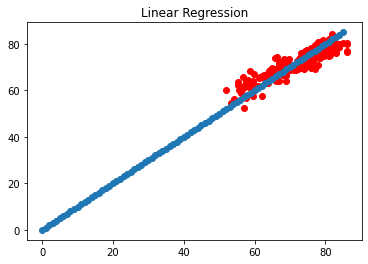

In [ ]:
plotGraph(y_test, y_predicted, 'Linear Regression')

This time I dropped Country feature and again trained a new linear regression mdoel and tets it using test data and plot the result beside printing results and coefficients.

In [ ]:
x_train_drop_country = x_train.drop('Country', axis=1)
x_test_drop_country = x_test.drop('Country', axis=1)
x_train_drop_country.shape

(1021, 20)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(x_train_drop_country, y_train)

print(f'Slopes(ai) : {linear_regression.coef_}')
print('Intercept(b) : ' + str(linear_regression.intercept_))

y_predicted = linear_regression.predict(x_test_drop_country)
linear_regression_results(y_test, y_predicted)

Slopes(ai) : [-1.50704406e-01 -1.30281563e-01 -1.79760171e-02  8.44409046e-02
 -1.95040618e-01  1.01090442e-03  3.47220550e-03 -2.90665283e-05
  3.39882077e-02 -6.65133852e-02  2.07617373e-03  2.12368464e-01
  7.23456679e-04 -5.66144839e-01 -4.04921680e-05  1.07670569e-08
 -9.49016795e-03 -1.79256368e-03  7.66871136e+00  9.42455912e-01]
Intercept(b) : 357.2531534308312
Variance 0.8047684193
R-Square:  0.8007963063
MAE:  2.7348424022
MSE:  11.3652278409
RMSE:  3.3712353583


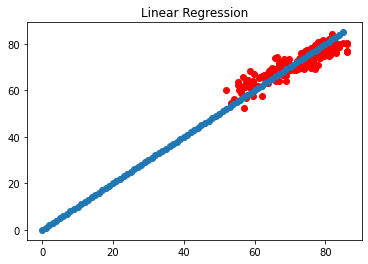

In [ ]:
plotGraph(y_test, y_predicted, 'Linear Regression')

Rrsult : After removing country column, our Variance, mean absolute error, mean squared error and root mean squared error increased a little a bit, but $R_2$ score decreased a little a bit.

In order to answer which approach is correct, first I need to check what does each of metric try to tell me about data and mode.

Variance :  Variance measures the spread of the predicted values around the mean. A higher variance indicates that the model is sensitive to the input data, which may result in overfitting. Therefore, you want to minimize variance.

$R_2$ score: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (life expectancy) that is predictable from the independent variables. A higher R2 score close to 1 indicates a better fit of the model to the data.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual and predicted values. Lower MAE values indicate better model accuracy.

Mean Squared Error (MSE): MSE measures the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE, providing a measure of the model’s prediction error. Lower RMSE values indicate better predictive performance.

So in short I can summarize:

Varince -> minimize

$R_2$ -> maximize (close to 1)

MAE -> minimize

MSE -> minimize

RMSE -> minimze

In the second approach that we dropped country feature we had decrease in $R_2$ and increase in all other metrics that shows we had a little of overfitting based on higher variance, and accuracy and performance were down. So first approach (including country feature) is better.

#### e. Now test-train split the dataset randomly and perform the previous steps. How did the results change? Compare these results to part d. Which approach is correct?

This time I do not care about overlap in country feature in train. and test dataset. Just randomly splitted the data with 20-8 test/train ration.

In [ ]:
X= cleaned_df.drop('Life expectancy ', axis=1)
y= cleaned_df['Life expectancy ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

print(f'Slopes(ai) : {linear_regression.coef_}')
print('Intercept(b) : ' + str(linear_regression.intercept_))

y_predicted = linear_regression.predict(X_test)
linear_regression_results(y_test, y_predicted)

Slopes(ai) : [ 3.46285308e-05 -1.02128161e-01 -7.21034247e-01 -1.72270746e-02
  1.09958248e-01 -1.89913862e-01  6.03200139e-04  2.64228178e-03
 -3.76506775e-06  3.26973850e-02 -8.15916684e-02 -6.49507384e-03
  3.11454901e-01  1.31281946e-02 -6.69107038e-01  5.67313315e-06
  1.48423585e-09 -1.52589768e-02 -8.07003030e-02  9.56503043e+00
  8.30749800e-01]
Intercept(b) : 260.00134366026543
Variance 0.760046407
R-Square:  0.7593602122
MAE:  2.8179304646
MSE:  13.2668344057
RMSE:  3.6423665941


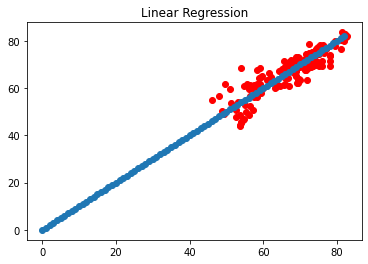

In [ ]:
plotGraph(y_test, y_predicted, 'Linear Regression')

This time with the previous randomly splitted data, I dropped Country feature and train my model again and test it.

In [ ]:
X = X.drop('Country', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

print(f'Slopes(ai) : {linear_regression.coef_}')
print('Intercept(b) : ' + str(linear_regression.intercept_))

y_predicted = linear_regression.predict(X_test)
linear_regression_results(y_test, y_predicted)

Slopes(ai) : [-1.02138903e-01 -7.21551304e-01 -1.72266188e-02  1.09949500e-01
 -1.89953152e-01  6.03029929e-04  2.64307337e-03 -3.76399491e-06
  3.26981948e-02 -8.15852395e-02 -6.49349990e-03  3.11475284e-01
  1.31267559e-02 -6.69101382e-01  5.68517167e-06  1.48923629e-09
 -1.53439590e-02 -8.06524791e-02  9.56546912e+00  8.30699185e-01]
Intercept(b) : 260.0255785281799
Variance 0.7600507566
R-Square:  0.7593481558
MAE:  2.8177200872
MSE:  13.2674990936
RMSE:  3.6424578369


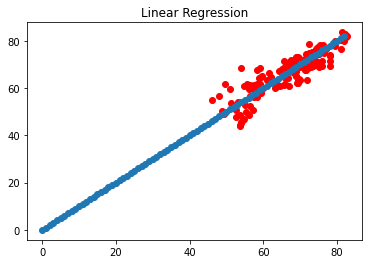

In [ ]:
plotGraph(y_test, y_predicted, 'Linear Regression')

By dropping country feature, Variance, mean squared error and root squared error increased and $R_2$ score and mean squred error decreased.

In order to answer which approach is correct, first I need to check what does each of metric try to tell me about data and mode.

Variance :  Variance measures the spread of the predicted values around the mean. A higher variance indicates that the model is sensitive to the input data, which may result in overfitting. Therefore, you want to minimize variance.

$R_2$ score: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (life expectancy) that is predictable from the independent variables. A higher R2 score close to 1 indicates a better fit of the model to the data.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual and predicted values. Lower MAE values indicate better model accuracy.

Mean Squared Error (MSE): MSE measures the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE, providing a measure of the model’s prediction error. Lower RMSE values indicate better predictive performance.

So in short I can summarize:

Varince -> minimize

$R_2$ -> maximize (close to 1)

MAE -> minimize

MSE -> minimize

RMSE -> minimze

Again here it seems that the approach of including country feature works better.

#### f. Train a simple linear regression model and another one with L1 regularization. Compare the model weights. Explain the results with the correlation values you calculated before.

In this part I used L1 regularization in my linear regression model. I splitted data randomly with 20-8- test/train ratio. Define a lasso model and trained it using test data and then test it using test data.

In [ ]:
X= cleaned_df.drop('Life expectancy ', axis=1)
y= cleaned_df['Life expectancy ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
X_train

Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
17        1.0  2014     1.0              8.0              0     4.51   
18        1.0  2013     1.0             84.0              0     4.76   
19        1.0  2012     1.0             86.0              0     5.14   
20        1.0  2011     1.0             88.0              0     5.37   
21        1.0  2010     1.0             91.0              1     5.28   
...       ...   ...     ...              ...            ...      ...   
2275    106.0  2005     1.0            135.0              1     9.60   
2276    106.0  2004     1.0            134.0              1     7.42   
2282    107.0  2014     1.0             17.0              0     0.01   
2283    107.0  2013     1.0            172.0              0     0.01   
2284    107.0  2012     1.0            174.0              0     0.01   

      percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
17                428.749067         98.0         0   57.2  ...   98.0   
18                430.876979         99.0         0   56.5  ...   99.0   
19                412.443356         99.0         9   55.8  ...   99.0   
20                437.062100         99.0        28   55.1  ...   99.0   
21                 41.822757         99.0        10   54.3  ...   99.0   
...                      ...          ...       ...    ...  ...    ...   
2275              503.111595         65.0         2   53.9  ...   98.0   
2276              462.707676         89.0        11   53.3  ...   96.0   
2282              151.104555         99.0         0   36.2  ...   99.0   
2283             1521.672751         99.0         0   35.5  ...   98.0   
2284              177.263396         99.0         0   34.8  ...   98.0   

      Total expenditure  Diphtheria    HIV/AIDS           GDP  Population  \
17                 5.88         98.0        0.1   4575.763787    288914.0   
18                 5.66         99.0        0.1   4414.723140    289592.0   
19                 5.59         99.0        0.1   4247.614380      2941.0   
20                 5.71         99.0        0.1   4437.178680    295195.0   
21                 5.34         99.0        0.1    494.358832    291321.0   
...                 ...          ...        ...           ...         ...   
2275               8.70         98.0        0.1   3528.131800    744769.0   
2276               8.24         88.0        0.1   3331.228766   7463157.0   
2282               3.37         99.0        0.1   1557.778920     91359.0   
2283               3.58         98.0        0.1  15687.347950     89949.0   
2284               4.80         98.0        0.1  12845.173630      8833.0   

       thinness  1-19 years   thinness 5-9 years  \
17                      1.2                  1.3   
18                      1.3                  1.4   
19                      1.3                  1.4   
20                      1.4                  1.5   
21                      1.4                  1.5   
...                     ...                  ...   
2275                    2.5                  2.6   
2276                    2.6                  2.6   
2282                    5.7                  6.0   
2283                    5.7                  6.1   
2284                    5.7                  6.1   

      Income composition of resources  Schooling  
17                              0.761       14.2  
18                              0.759       14.2  
19                              0.752       14.2  
20                              0.738       13.3  
21                              0.725       12.5  
...                               ...        ...  
2275                            0.730       13.2  
2276                            0.720       13.1  
2282                            0.766       13.2  
2283                            0.762       13.5  
2284                            0.755       13.5  

[1067 rows x 21 columns]

In [ ]:
X_train.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Problem : The coefficients do not match correlation. Schooling has the highets correlation but Income composition of resources, the second highest correlation has the largets coefficient. So it might be becaus eof muticolinearity. I try to drop Income composition of resources because Schooling and Income composition of resourcesa has higher correlation so dropping Income composition of resources might help.

Solution :

In [ ]:
X = X.drop('Income composition of resources', axis=1)
X


Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
17        1.0  2014     1.0              8.0              0     4.51   
18        1.0  2013     1.0             84.0              0     4.76   
19        1.0  2012     1.0             86.0              0     5.14   
20        1.0  2011     1.0             88.0              0     5.37   
21        1.0  2010     1.0             91.0              1     5.28   
...       ...   ...     ...              ...            ...      ...   
2910    131.0  2011     1.0            366.0             29     2.57   
2911    131.0  2010     1.0            363.0             30     2.47   
2913    131.0  2008     1.0             45.0             31     2.12   
2914    131.0  2007     1.0            487.0             32     2.08   
2916    131.0  2005     1.0            554.0             34     2.33   

      percentage expenditure  Hepatitis B  Measles    BMI   \
17                428.749067         98.0         0   57.2   
18                430.876979         99.0         0   56.5   
19                412.443356         99.0         9   55.8   
20                437.062100         99.0        28   55.1   
21                 41.822757         99.0        10   54.3   
...                      ...          ...       ...    ...   
2910              183.046169         81.0     13234   21.2   
2911              184.364910         83.0     15754    2.7   
2913              153.678375         87.0       140   19.7   
2914               10.851482          8.0       535   19.2   
2916              121.879331         82.0        45   18.4   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
17                     1   98.0               5.88         98.0        0.1   
18                     1   99.0               5.66         99.0        0.1   
19                     1   99.0               5.59         99.0        0.1   
20                     1   99.0               5.71         99.0        0.1   
21                     1   99.0               5.34         99.0        0.1   
...                  ...    ...                ...          ...        ...   
2910                  44   83.0               4.26         81.0        6.3   
2911                  45    8.0               4.41         83.0        6.8   
2913                  49    9.0               4.87         87.0       11.9   
2914                  51   77.0               4.37          8.0       13.6   
2916                  55   84.0               7.56         82.0       17.0   

              GDP  Population   thinness  1-19 years   thinness 5-9 years  \
17    4575.763787    288914.0                    1.2                  1.3   
18    4414.723140    289592.0                    1.3                  1.4   
19    4247.614380      2941.0                    1.3                  1.4   
20    4437.178680    295195.0                    1.4                  1.5   
21     494.358832    291321.0                    1.4                  1.5   
...           ...         ...                    ...                  ...   
2910  1644.619672  14264756.0                    6.6                  6.4   
2911  1463.213573    138533.0                    6.7                  6.5   
2913  1369.682490   1382517.0                    6.8                  6.7   
2914   114.587985  12725974.0                    6.9                  6.8   
2916   691.317816   1252156.0                    7.1                  7.0   

      Schooling  
17         14.2  
18         14.2  
19         14.2  
20         13.3  
21         12.5  
...         ...  
2910       12.0  
2911       11.8  
2913       11.4  
2914       11.1  
2916       10.7  

[1334 rows x 20 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [ ]:
X_train

Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
17        1.0  2014     1.0              8.0              0     4.51   
18        1.0  2013     1.0             84.0              0     4.76   
19        1.0  2012     1.0             86.0              0     5.14   
20        1.0  2011     1.0             88.0              0     5.37   
21        1.0  2010     1.0             91.0              1     5.28   
...       ...   ...     ...              ...            ...      ...   
2275    106.0  2005     1.0            135.0              1     9.60   
2276    106.0  2004     1.0            134.0              1     7.42   
2282    107.0  2014     1.0             17.0              0     0.01   
2283    107.0  2013     1.0            172.0              0     0.01   
2284    107.0  2012     1.0            174.0              0     0.01   

      percentage expenditure  Hepatitis B  Measles    BMI   \
17                428.749067         98.0         0   57.2   
18                430.876979         99.0         0   56.5   
19                412.443356         99.0         9   55.8   
20                437.062100         99.0        28   55.1   
21                 41.822757         99.0        10   54.3   
...                      ...          ...       ...    ...   
2275              503.111595         65.0         2   53.9   
2276              462.707676         89.0        11   53.3   
2282              151.104555         99.0         0   36.2   
2283             1521.672751         99.0         0   35.5   
2284              177.263396         99.0         0   34.8   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
17                     1   98.0               5.88         98.0        0.1   
18                     1   99.0               5.66         99.0        0.1   
19                     1   99.0               5.59         99.0        0.1   
20                     1   99.0               5.71         99.0        0.1   
21                     1   99.0               5.34         99.0        0.1   
...                  ...    ...                ...          ...        ...   
2275                   1   98.0               8.70         98.0        0.1   
2276                   1   96.0               8.24         88.0        0.1   
2282                   0   99.0               3.37         99.0        0.1   
2283                   0   98.0               3.58         98.0        0.1   
2284                   0   98.0               4.80         98.0        0.1   

               GDP  Population   thinness  1-19 years   thinness 5-9 years  \
17     4575.763787    288914.0                    1.2                  1.3   
18     4414.723140    289592.0                    1.3                  1.4   
19     4247.614380      2941.0                    1.3                  1.4   
20     4437.178680    295195.0                    1.4                  1.5   
21      494.358832    291321.0                    1.4                  1.5   
...            ...         ...                    ...                  ...   
2275   3528.131800    744769.0                    2.5                  2.6   
2276   3331.228766   7463157.0                    2.6                  2.6   
2282   1557.778920     91359.0                    5.7                  6.0   
2283  15687.347950     89949.0                    5.7                  6.1   
2284  12845.173630      8833.0                    5.7                  6.1   

      Schooling  
17         14.2  
18         14.2  
19         14.2  
20         13.3  
21         12.5  
...         ...  
2275       13.2  
2276       13.1  
2282       13.2  
2283       13.5  
2284       13.5  

[1067 rows x 20 columns]

In [ ]:
# Train the Lasso Regression model with L1 regularization
lasso = Lasso(alpha=0.1)  #alpha parameter can be changed for regularization strength
lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)
print('Intercept(b) : ' + str(linear_regression.intercept_))
feature_names = ['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years','Schooling']
for feature, coef in zip(feature_names, linear_regression.coef_):
    if feature == 'Income composition of resources':
        print()
    print(f'{feature}: {coef}')


y_pred_lasso = lasso.predict(X_test)
linear_regression_results(y_test, y_pred_lasso)

Intercept(b) : 260.0255785281799
Country: -0.10213890330625684
Year: -0.7215513042264797
Status: -0.017226618795969772
Adult Mortality: 0.1099495000936376
infant deaths: -0.18995315171555624
Alcohol: 0.0006030299285425886
percentage expenditure: 0.0026430733730917065
Hepatitis B: -3.7639949095345226e-06
Measles : 0.03269819481826309
 BMI : -0.08158523948441321
under-five deaths : -0.006493499899819046
Polio: 0.31147528361174
Total expenditure: 0.013126755900586444
Diphtheria : -0.6691013822812375
 HIV/AIDS: 5.685171674107829e-06
GDP: 1.4892362898422107e-09
Population: -0.015343958959408589
 thinness  1-19 years: -0.08065247907908767
 thinness 5-9 years: 9.56546911569479
Schooling: 0.8306991854952284
Variance 0.7336832221
R-Square:  0.7335055826
MAE:  2.9101266715
MSE:  14.6922391293
RMSE:  3.8330456727


/Users/diba/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.268e+01, tolerance: 6.506e+00
  model = cd_fast.enet_coordinate_descent(


Result : After removing Income composition of resources because its correlation with Schooling was too way high, now yes our coefficients match the correlation. Also we have a little decrease in Variance, MAE, MSE and RMSE and a little of increase in $R_2$, which means our model is performing and fitting better.